In [48]:
import sys
sys.path.append('/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages')
!pip3 install numpy
!pip3 install tensorflow
!pip3 install sklearn
!pip3 install matplotlib
!pip3 install keras
!pip3 install matplotlib
import matplotlib.pyplot as plt
import keras

import tensorflow as tf
import numpy as np
import sklearn

In [49]:
data=keras.datasets.fashion_mnist # fashion_mnist contains 60000 images of cloting apparels
(train_images,train_labels),(test_images,test_labels)=data.load_data() #dividing into train test data
# it is labelled data 

In [ ]:
class_names=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
train_images=train_images/255.0   # scaling down out images
test_images=test_images/255.0

In [15]:
#     *  *  * creating a model  *  *  *
    
model=keras.Sequential([    # using sequential model which simply defines a sequence of layers starting with the input layer and ending with the output layer
    keras.layers.Flatten(input_shape=(28,28)), # making input layer with 28*28 pixels =784 neurons
    keras.layers.Dense(128,activation="relu"),  # making hidden layer with 128 neurons
    keras.layers.Dense(10,activation="softmax")  # making second hidden layer with 10 neurons which correspond to out 10 classes ( clothings)
])    
 
#.  *.  *.  *. training and testing the model *. *. *  
# Compiling the model is just picking the optimizer, loss function and metrics to keep track of. Training is the process of passing our data to the model.
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(train_images,train_labels,epochs=6)

Epoch 1/6
60000/60000 [==============================] - 7s 109us/step - loss: 0.4989 - accuracy: 0.8257
Epoch 2/6
60000/60000 [==============================] - 6s 100us/step - loss: 0.3723 - accuracy: 0.8649
Epoch 3/6
60000/60000 [==============================] - 6s 95us/step - loss: 0.3338 - accuracy: 0.8773
Epoch 4/6
60000/60000 [==============================] - 6s 93us/step - loss: 0.3118 - accuracy: 0.8857
Epoch 5/6
60000/60000 [==============================] - 6s 105us/step - loss: 0.2933 - accuracy: 0.8921
Epoch 6/6
60000/60000 [==============================] - 6s 99us/step - loss: 0.2819 - accuracy: 0.8950


In [16]:
# testing the model. 
test_loss,test_acc=model.evaluate(test_images,test_labels)
print("\n Test accuracy :",test_acc)


10000/10000 [==============================] - 0s 48us/step

 Test accuracy : 0.8802000284194946


In [18]:
prediction=model.predict(test_images)
print(prediction) # predictions of each test_images , probabilities of how certain some prediction is


[[1.4756936e-06 2.1833102e-08 6.2742664e-08 ... 7.4688695e-02
  7.1255497e-05 9.1807228e-01]
 [2.4360510e-05 1.5055736e-11 9.9921060e-01 ... 1.5456701e-18
  7.4192963e-10 2.0030226e-13]
 [1.3940266e-07 9.9999988e-01 4.7171339e-10 ... 1.6087462e-17
  5.0048404e-10 1.1064683e-15]
 ...
 [4.8494553e-03 1.7320664e-08 4.4130819e-04 ... 9.8002122e-09
  9.9428576e-01 1.9234769e-10]
 [4.4991079e-08 9.9999416e-01 4.2116075e-09 ... 8.0311274e-10
  2.7505789e-09 1.6404293e-09]
 [1.9691282e-05 1.8132694e-07 7.7458581e-06 ... 1.2581616e-02
  1.2972114e-03 4.2052561e-05]]


In [37]:
print(prediction[0])  # selecting prediction for one image

[1.4756936e-06 2.1833102e-08 6.2742664e-08 1.0167726e-06 4.2565728e-07
 7.1519720e-03 1.2812768e-05 7.4688695e-02 7.1255497e-05 9.1807228e-01]


In [38]:
print(np.argmax(prediction[0])) # maximum prediction of an image I.e 9 means 'ankle boot'
print(class_names[np.argmax(prediction[0])])

9
Ankle boot


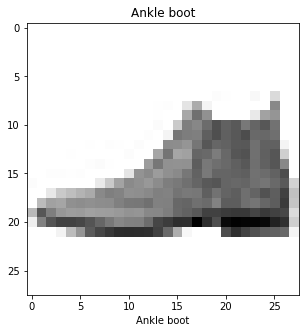

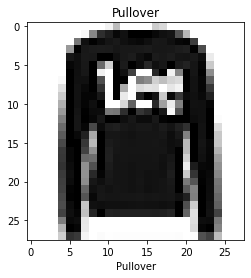

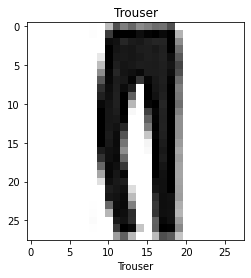

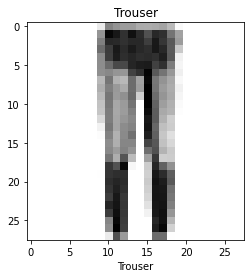

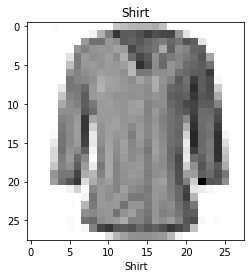

In [51]:

plt.figure(figsize=(5,5))
for i in range(5):
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[test_labels[i]])
    plt.title(class_names[np.argmax(prediction[i])])
    plt.show()
